NAME = SHYAM KUMAR RAJPOOT

COURSE = MCA

DOMAIN = DATA SCIENCE

TASK = Car Price Prediction With Machine Learning

Batch - MAY Phase 2 AICTE OIB-SIP 2024

In [96]:
# import usefull libraries for manipulation and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for training,selecting,and Evaluating
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import warnings

In [97]:
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('/content/sample_data/car data.csv')

In [99]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [100]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [101]:
df.dtypes
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [102]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [104]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [105]:
df.shape

(301, 9)

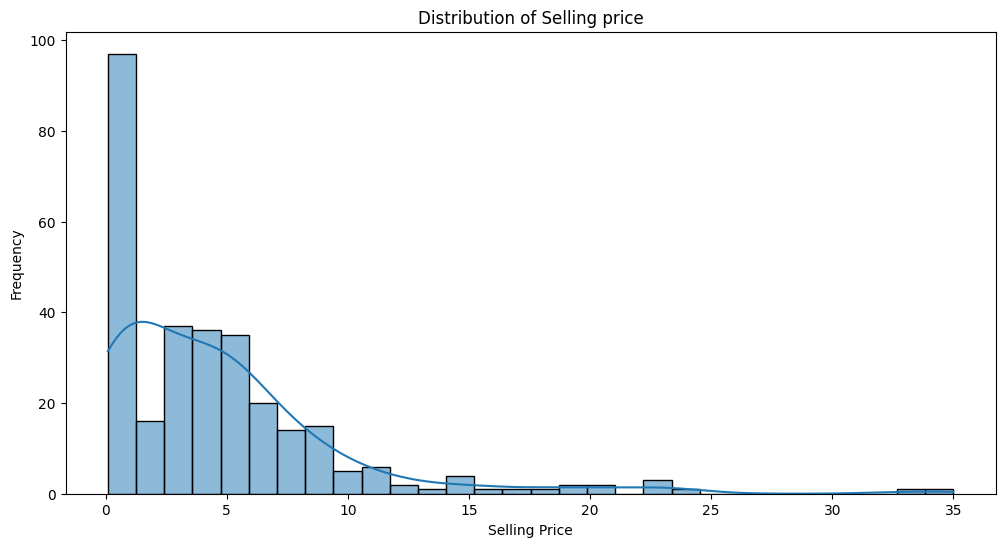

In [106]:
# visualize the distribution of Selling_Price
plt.figure(figsize=(12, 6))
sns.histplot(df['Selling_Price'],bins=30, kde=True)
plt.title('Distribution of Selling price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

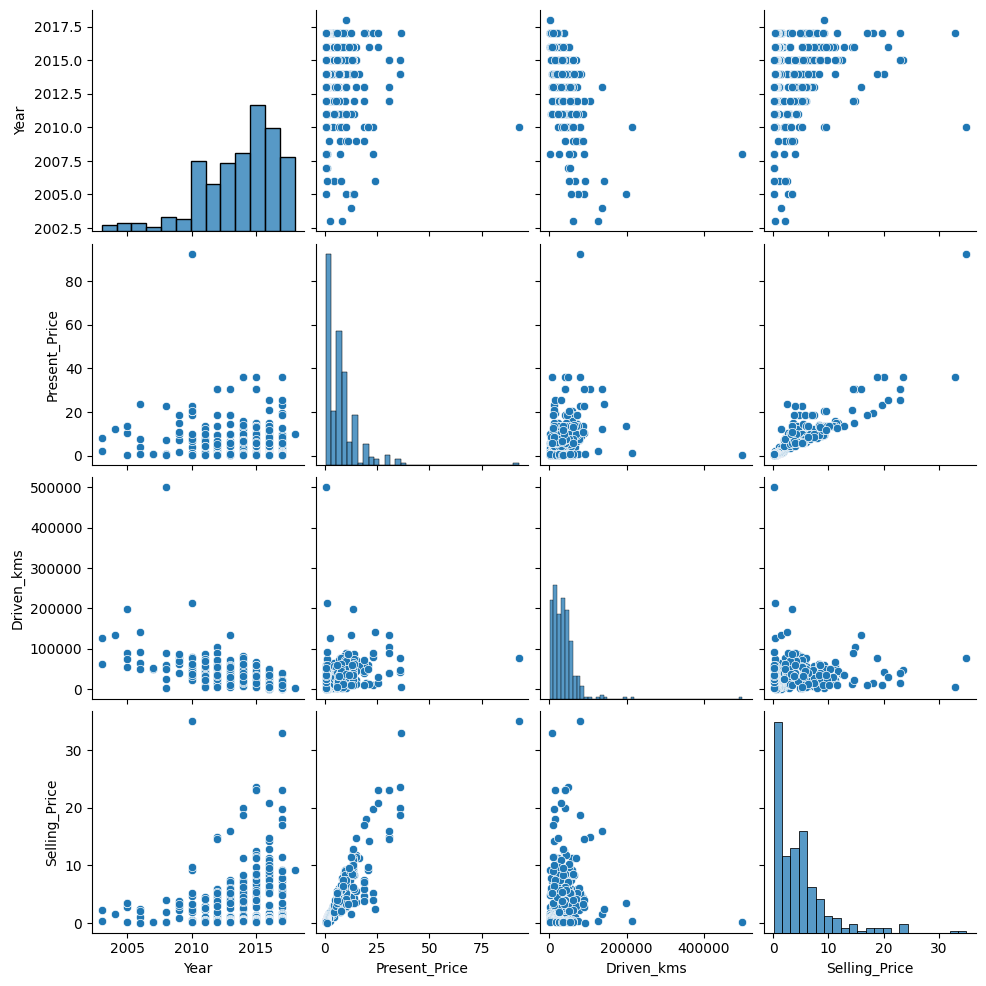

In [107]:
sns.pairplot(df, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'], palette = 'Dark2')
plt.show()

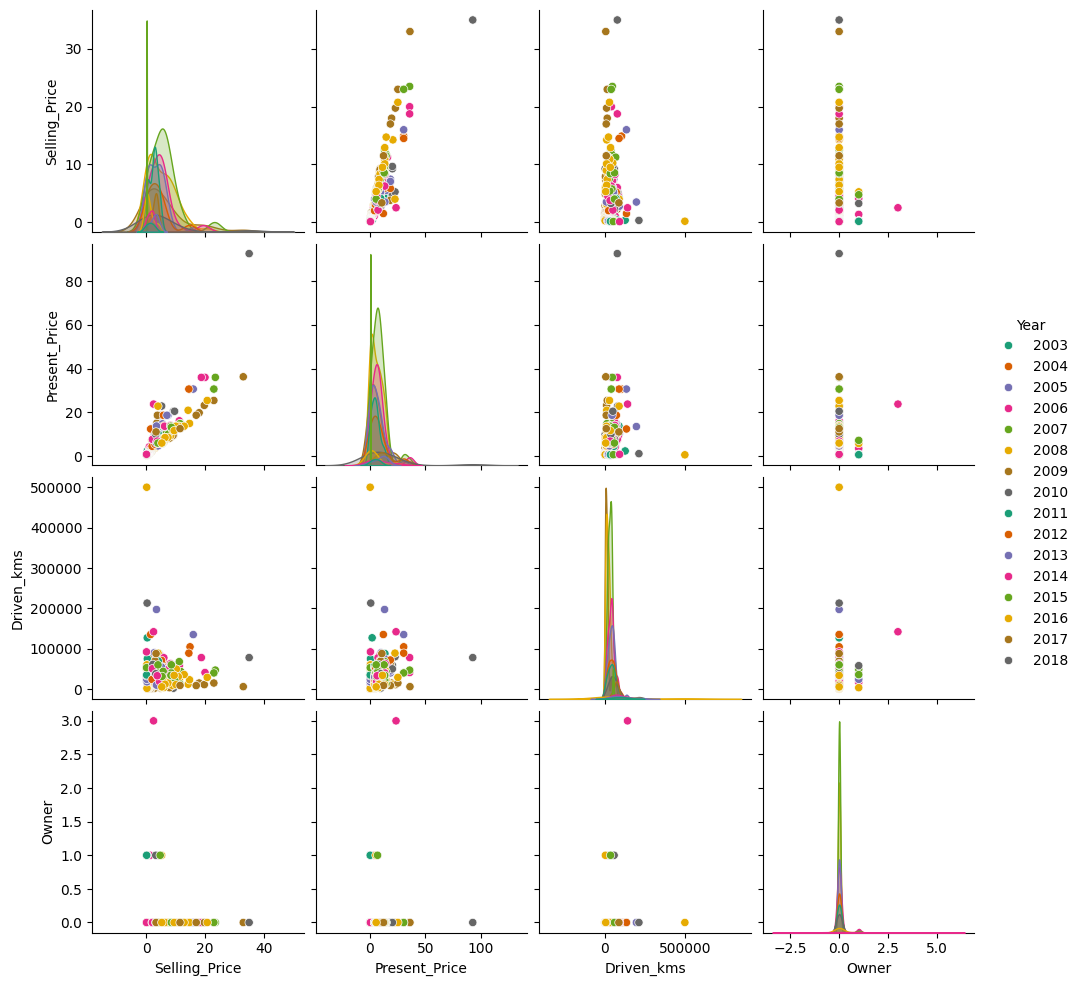

In [108]:
sns.pairplot(df, hue='Year', palette='Dark2')

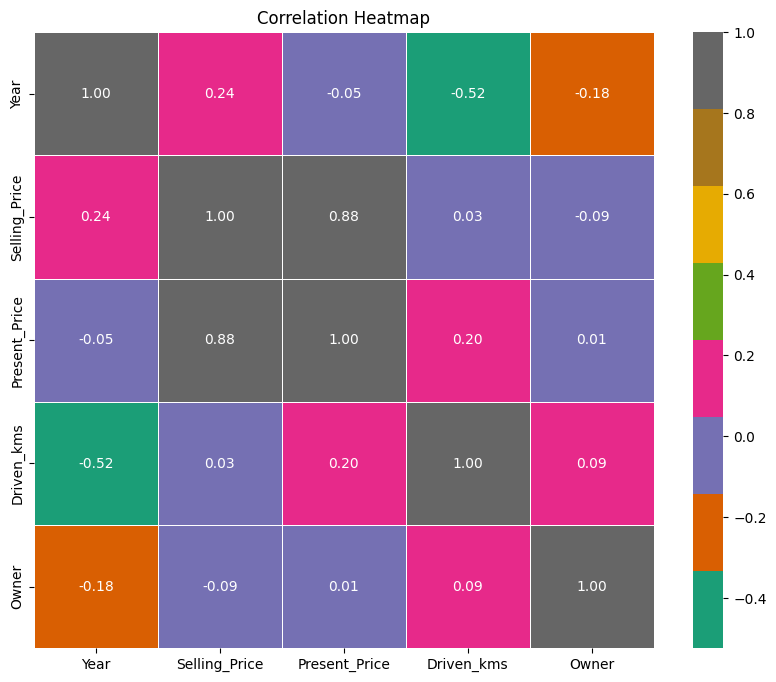

In [109]:

data = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms','Owner']]


# Compute and plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Dark2', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

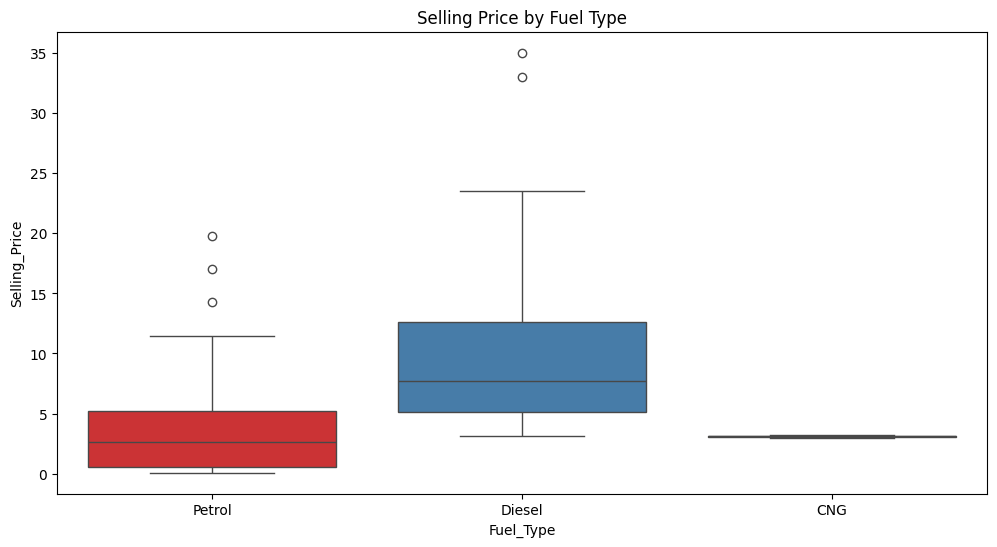

In [110]:
# box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set1')
plt.title('Selling Price by Fuel Type')
plt.show()

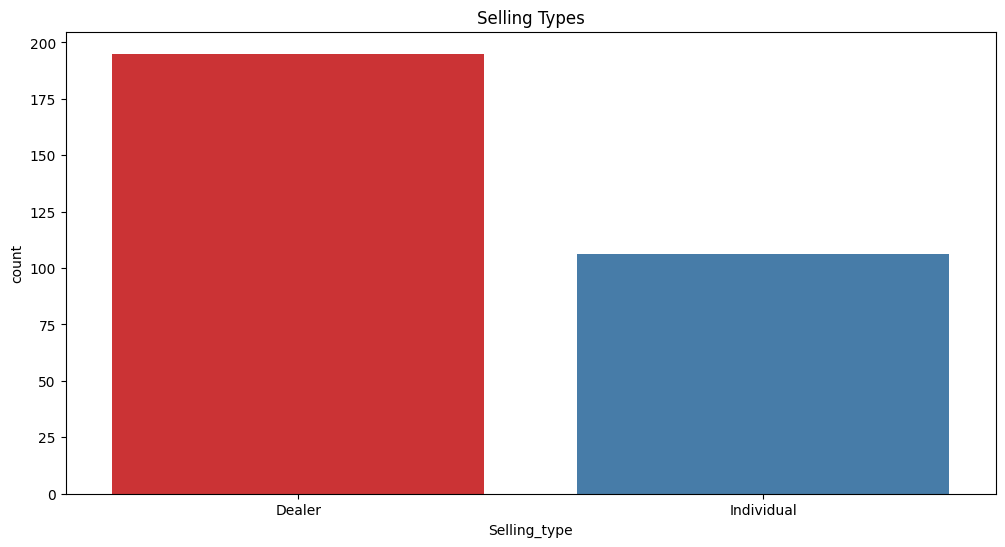

In [111]:
# count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Selling_type', data=df,  palette='Set1' )
plt.title('Selling Types')
plt.show()

<Figure size 1000x600 with 0 Axes>

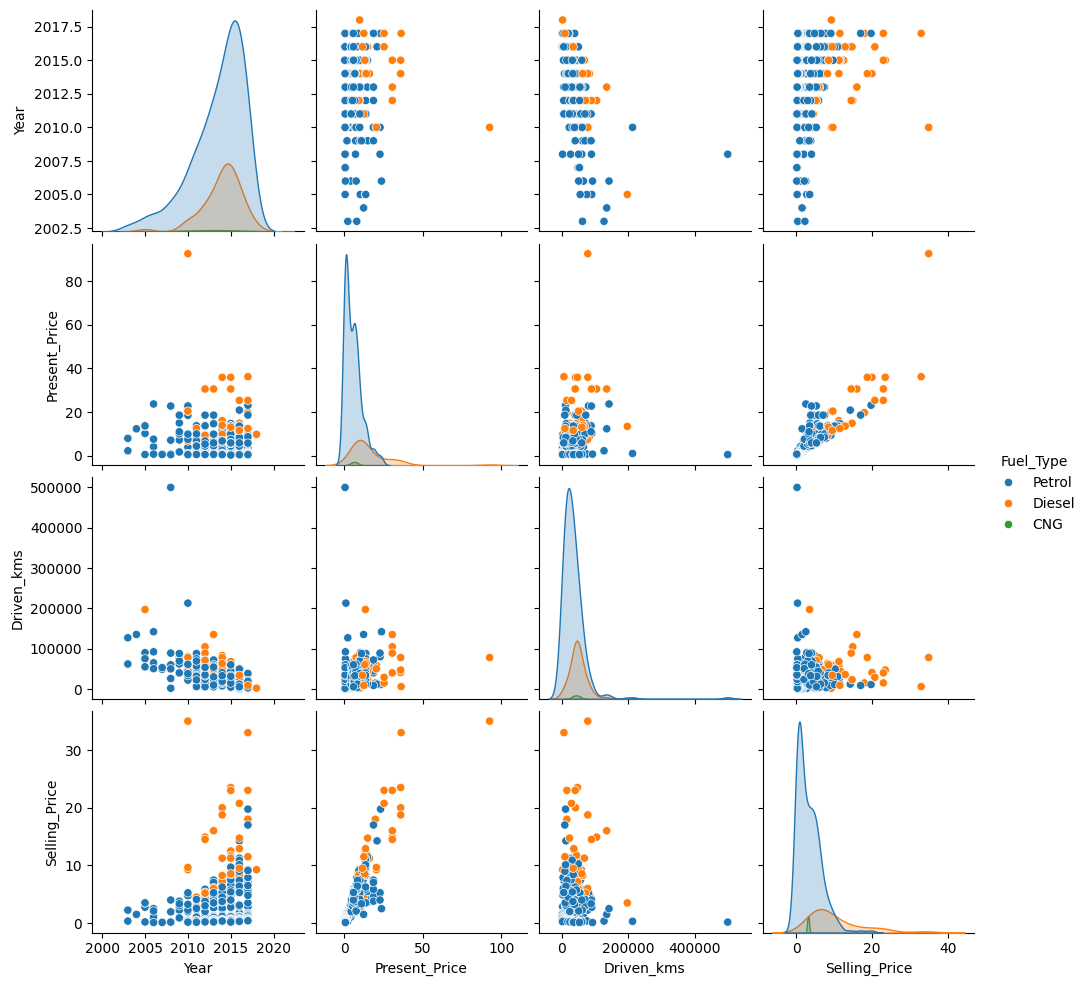

In [112]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'], hue='Fuel_Type')
plt.show()

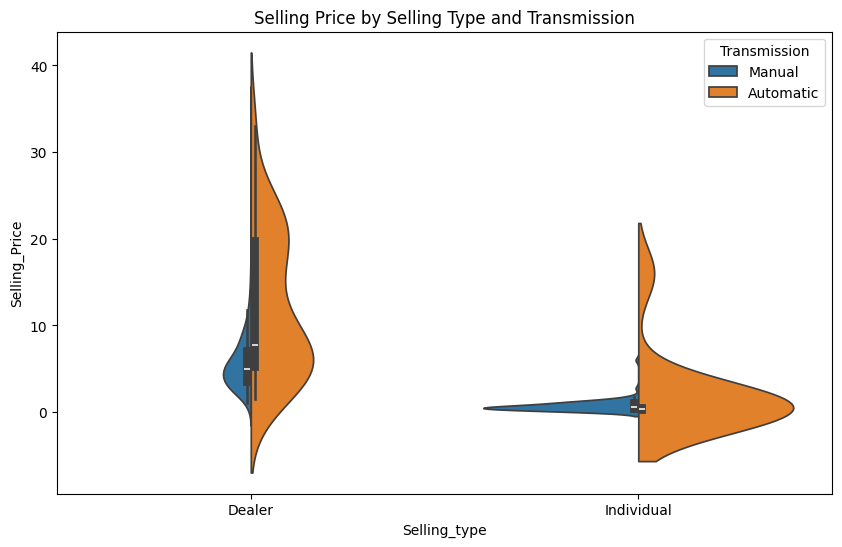

In [113]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Selling_type', y='Selling_Price', hue='Transmission', data=df, split=True)
plt.title('Selling Price by Selling Type and Transmission')
plt.show()

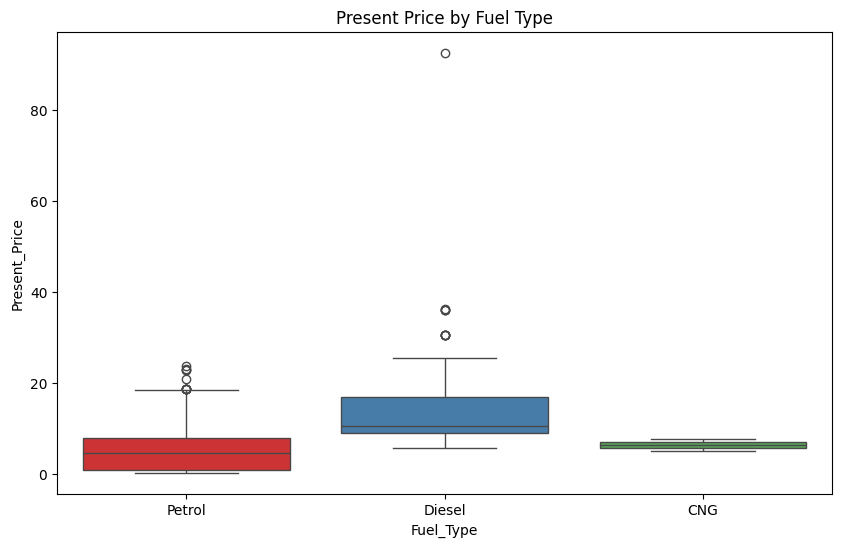

In [114]:
# Fuel_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Present_Price', data=df ,palette='Set1' )
plt.title('Present Price by Fuel Type')
plt.show()


In [115]:
features = ['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission']
target = 'Selling_Price'
X= df[features]
y = df[target]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['Year', 'Present_Price', 'Driven_kms']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [117]:
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [118]:
preprocessor = ColumnTransformer( transformers=[('num', numeric_transformer, numeric_features ),
 ('cat', categorical_transformer, categorical_features)])

In [119]:
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(random_state=42))])

In [120]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [121]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.8723871159016386
R-squared: 0.9621287180651648


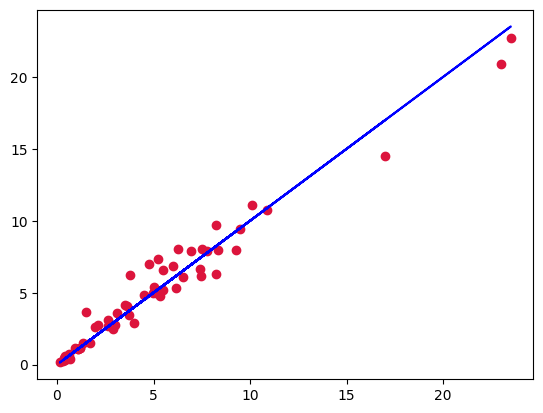

In [125]:
# Our prediction
plt.scatter(y_test, y_pred, c='crimson')

# correct predictions
plt.plot(y_test, y_test, 'b')


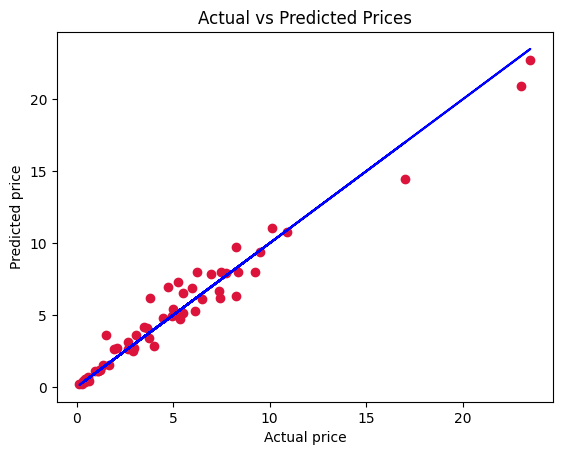

In [127]:
plt.scatter(y_test, y_pred, c='crimson')
plt.plot(y_test, y_test, 'b')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Prices')
plt.show()